## An Introduction to Supervised Learning with scikit-learn

Machine learning is broadly concerned with creating systems that learn from data to make predictions or uncover patterns. This field is typically divided into two main paradigms: unsupervised and supervised learning.

  * **Unsupervised Learning**: This involves analyzing **unlabeled data** to discover hidden structures, patterns, or groupings. A classic example is customer segmentation, where a business might use clustering algorithms to group its customers into distinct categories based on purchasing behaviour, without any prior knowledge of those categories.

  * **Supervised Learning**: In contrast, supervised learning works with **labeled data**. This means that for each data observation, we have a set of input features and a known, correct output value (the "label" or "target"). The primary goal is to train a model that learns the relationship between the features and the target, enabling it to accurately predict the target values for new, unseen data. The "supervision" comes from the fact that we provide the model with the correct answers during the training phase.

### Core Concepts of Supervised Learning

#### Classification vs. Regression

Supervised learning problems can be further categorized into two types based on the nature of their target variable:

1.  **Classification**: The target variable is **categorical**, meaning it consists of a finite set of discrete classes or labels. The model's goal is to predict which category a new observation belongs to.

      * *Examples*: Predicting if an email is `spam` or `not spam`; classifying a tumour as `benign` or `malignant`; identifying a handwritten digit from `0` to `9`.

2.  **Regression**: The target variable is **continuous**, meaning it can take on any numerical value within a given range. The model's goal is to predict a specific quantity.

      * *Examples*: Predicting the price of a house based on its features (size, location); forecasting the temperature for tomorrow; estimating the total sales for the next quarter.

#### Essential Terminology

The field uses specific terminology that is crucial to understand:

| Term | Synonyms | Description |
| :--- | :--- | :--- |
| **Features** | Predictor Variables, Independent Variables | The input variables (columns) used by the model to make a prediction. |
| **Target Variable**| Dependent Variable, Response Variable| The output variable that we are trying to predict. |
| **Sample/Observation**| Row, Instance | A single data point, consisting of a set of features and its corresponding target value. |
| **Training Data** | Labeled Data | The dataset used to "teach" or `fit` the model. It contains both features and their known target values. |

### Preparing Data for `scikit-learn`

Before applying any supervised learning algorithm using `scikit-learn`, the data must meet several requirements:

  * **No Missing Values**: Algorithms cannot process `NaN` (Not a Number) values. Any missing data must be either dropped or imputed (filled in with a plausible value).
  * **Numeric Format**: The features and target variable must be in a numeric format. Categorical string data must be converted into numbers using techniques like one-hot encoding or label encoding.
  * **Standard Data Structures**: The data should be stored in a `pandas` DataFrame or a `NumPy` array, as these are the primary data structures the library is designed to work with.

It is also a critical best practice to perform **Exploratory Data Analysis (EDA)** before any modeling. EDA helps you understand the distributions, relationships, and potential issues within your data, which informs both data preparation and model selection.

### The `scikit-learn` API: A Consistent Workflow

One of the great strengths of `scikit-learn` is its simple and consistent API. The process for training and using most models follows the same four steps:

1.  **Import**: Import the desired model class from the appropriate `sklearn` module.
2.  **Instantiate**: Create an instance of the model class. This is where you can set **hyperparameters**—configurable parameters that control the model's learning process.
3.  **Fit**: Train the model on your data by calling the `.fit(X, y)` method, where `X` is the array or DataFrame of features and `y` is the array of target labels. This is the "learning" step.
4.  **Predict**: Once the model is fitted, make predictions on new, unseen data by calling the `.predict(X_new)` method.

```python
# A conceptual example of the scikit-learn syntax
from sklearn.module import Model

# 1. & 2. Instantiate the model
model = Model(hyperparameter=value)

# 3. Fit the model to training data
# model.fit(X_features, y_target)

# 4. Predict on new data
# new_predictions = model.predict(X_new_features)
```

### A Practical Example: k-Nearest Neighbors (k-NN)

To illustrate the concepts, let's examine a popular and intuitive classification algorithm: **k-Nearest Neighbors (k-NN)**.

#### The k-NN Algorithm Explained

The core idea of k-NN is simple: **to classify a new data point, look at the 'k' most similar data points (its "nearest neighbors") from the training data and assign the new point the label that appears most frequently among those neighbors (a "majority vote").**

The "closeness" or "similarity" is typically measured using standard distance metrics, most commonly Euclidean distance. The `k` is a hyperparameter you choose; a small `k` makes the model sensitive to noise, while a large `k` can oversmooth the decision boundary.

#### Implementing k-NN with `scikit-learn`

Let's follow the standard `scikit-learn` workflow to build and use a k-NN classifier.

```python
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# 1. Prepare Data 
# Let's create a generic, reproducible dataset.
# Imagine we are predicting if a component will fail (1) or not (0)
# based on two sensor readings (pressure and vibration).
np.random.seed(42)
X_features = np.random.rand(100, 2) * 10
y_target = np.random.randint(0, 2, 100)

print(f"Shape of feature matrix (X): {X_features.shape}")
print(f"Shape of target vector (y): {y_target.shape}")

# 2. Import and Instantiate the Model 
# We'll choose k=5 neighbors for this example.
knn = KNeighborsClassifier(n_neighbors=5)

# 3. Fit the Model to the Data 
# The model "learns" by storing the training data.
knn.fit(X_features, y_target)
print("\nModel has been fitted.")

# 4. Predict on Unlabeled Data
# Let's create some new, unseen data points to make predictions for.
X_new_data = np.array([
    [2.5, 4.8],  # First new component
    [8.1, 7.3],  # Second new component
    [1.9, 1.1]   # Third new component
])

print(f"\nShape of new data matrix: {X_new_data.shape}")

# Use the fitted model to predict the labels for the new data
predictions = knn.predict(X_new_data)

print(f"\nPredictions for new data: {predictions}")
# The output will be an array like [0, 1, 0], predicting the class for each new sample.
```

This example encapsulates the entire supervised learning process: preparing labeled data (`X_features`, `y_target`), training a model (`knn.fit`), and using it to predict outcomes for new, unlabeled data (`knn.predict`).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
churn_df = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5981/datasets/8582db71ec282f17c504c8eb794d54758fd8d5d8/telecom_churn_clean.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

# Instantiate a KNeighborsClassifier called knn with 6 neighbors.
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data using the .fit() method.
knn.fit(X, y)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])

print(X_new.shape)

(3, 2)


In [ ]:
predictions = knn.predict(X_new)
print(f"Predictions: {predictions}")

Predictions: [1 0 0]


In [ ]:
# Import KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## The Need for an Honest Evaluation

After training a model, we need a way to measure how well it performs. For classification tasks, the most straightforward metric is **accuracy**, which is simply the proportion of correct predictions.

**Accuracy** = `(Number of Correct Predictions) / (Total Number of Observations)`

A crucial mistake is to calculate accuracy on the same data the model was trained on. This is like giving a student the final exam questions and answers to study with - of course, they'll score perfectly\! A model evaluated on its training data will often appear to perform exceptionally well, but this score doesn't reflect its ability to **generalize** to new, unseen data, which is the entire point of machine learning.

The correct approach is to split our labeled data into two parts:

  * **Training Set**: The majority of the data, used to `fit` the model.
  * **Test Set**: A smaller, hold-out portion of the data, used exclusively for evaluating the final performance of the fitted model.

### Train/Test Split in `scikit-learn`

`scikit-learn` provides a convenient function, `train_test_split`, to perform this data splitting.

```python
from sklearn.model_selection import train_test_split

# X: features, y: target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=y)
```

This function has several important parameters:

  * `test_size`: The proportion of the dataset to allocate to the test set (e.g., `0.3` for 30%).
  * `random_state`: A seed for the random number generator. Setting this ensures that the split is **reproducible**—you'll get the same train/test split every time you run the code.
  * `stratify`: This is particularly useful for classification. `stratify=y` ensures that the distribution of the target variable `y` is the same in both the training and test sets. This prevents a scenario where, by chance, one set gets a disproportionate number of samples from a specific class.

Once the data is split, we can fit our model and score it:

```python
from sklearn.neighbors import KNeighborsClassifier
# Assume X_train, X_test, y_train, y_test are available

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# The .score() method calculates the accuracy on the test data
print(knn.score(X_test, y_test))
```
### Model Complexity, Overfitting, and Underfitting

The performance of a model is closely tied to its **complexity**. In the case of our k-Nearest Neighbors (k-NN) algorithm, complexity is controlled by the number of neighbors, `k`.

  * **Low `k` (e.g., k=1)**: This creates a **highly complex** model. The decision boundary is very jagged and follows the training data closely, including its noise. This can lead to **overfitting**, where the model performs perfectly on the training data but poorly on the test data because it has memorized the noise instead of learning the underlying pattern. 
  * **High `k` (e.g., k=50)**: This creates a **less complex** (simpler) model. The decision boundary is very smooth. This can lead to **underfitting**, where the model is too simple to capture the true underlying pattern in the data, resulting in poor performance on both the training and test sets. 

The goal is to find a "sweet spot" for `k` that balances this trade-off, creating a model that generalizes well.


### Visualizing Model Performance

We can find the optimal value for `k` by fitting and evaluating the model with a range of different `k` values and plotting the results. This allows us to visually inspect the trade-off between training and testing accuracy.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create a generic, reproducible dataset
np.random.seed(42)
X = np.random.rand(100, 2)
# Create a circular decision boundary for a clear example
y = ((X - 0.5)**2).sum(axis=1) < 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


# Set up dictionaries to store training and testing accuracies
train_accuracies = {}
test_accuracies = {}

# Define a range of k values to test
neighbors = np.arange(1, 26)

# Loop through the range of k values
for k_value in neighbors:
    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k_value)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Store the accuracies
    train_accuracies[k_value] = knn.score(X_train, y_train)
    test_accuracies[k_value] = knn.score(X_test, y_test)

# Plot the results 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("k-NN: Model Complexity vs. Accuracy")
ax.plot(train_accuracies.keys(), train_accuracies.values(), label="Training Accuracy")
ax.plot(test_accuracies.keys(), test_accuracies.values(), label="Testing Accuracy")
ax.legend()
ax.set_xlabel("Number of Neighbors (k)")
ax.set_ylabel("Accuracy")
ax.set_xticks(np.arange(0, 27, 2))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
```

The resulting plot will typically show:

  * **Training Accuracy**: Starts very high (often 1.0 for k=1) and gradually decreases as `k` increases and the model becomes less complex.
  * **Testing Accuracy**: Starts lower, increases to a peak, and then decreases as the model starts to underfit.

The optimal value for `k` is the one that corresponds to the **highest point on the testing accuracy curve**, as this represents the model that generalizes best to unseen data. 

In [ ]:
# Import train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split

# Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Fit the knn model to the training data.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Compute and print the model's accuracy for the test data.
print(knn.score(X_test, y_test))

0.8740629685157422


In [ ]:
# Create neighbors as a numpy array of values from 1 up to and including 12.
neighbors = np.arange(1, 13)

train_accuracies = {}
test_accuracies = {}

# Instantiate a KNeighborsClassifier, with the number of neighbors equal to the neighbor iterator.
for neighbor in neighbors:

    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the train_accuracies and test_accuracies dictionaries, respectively, utilizing the neighbor iterator as the index.
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Print the results in a more readable format
print("K values:", neighbors)
print("\nTraining Accuracies:")
for k, acc in train_accuracies.items():
    print(f"  k={k}: {acc:.4f}")
print("\nTest Accuracies:")
for k, acc in test_accuracies.items():
    print(f"  k={k}: {acc:.4f}")

K values: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Training Accuracies:
  k=1: 1.0000
  k=2: 0.9036
  k=3: 0.9115
  k=4: 0.8946
  k=5: 0.8953
  k=6: 0.8893
  k=7: 0.8886
  k=8: 0.8863
  k=9: 0.8871
  k=10: 0.8841
  k=11: 0.8875
  k=12: 0.8837

Test Accuracies:
  k=1: 0.7946
  k=2: 0.8606
  k=3: 0.8501
  k=4: 0.8696
  k=5: 0.8741
  k=6: 0.8651
  k=7: 0.8711
  k=8: 0.8636
  k=9: 0.8726
  k=10: 0.8666
  k=11: 0.8711
  k=12: 0.8711


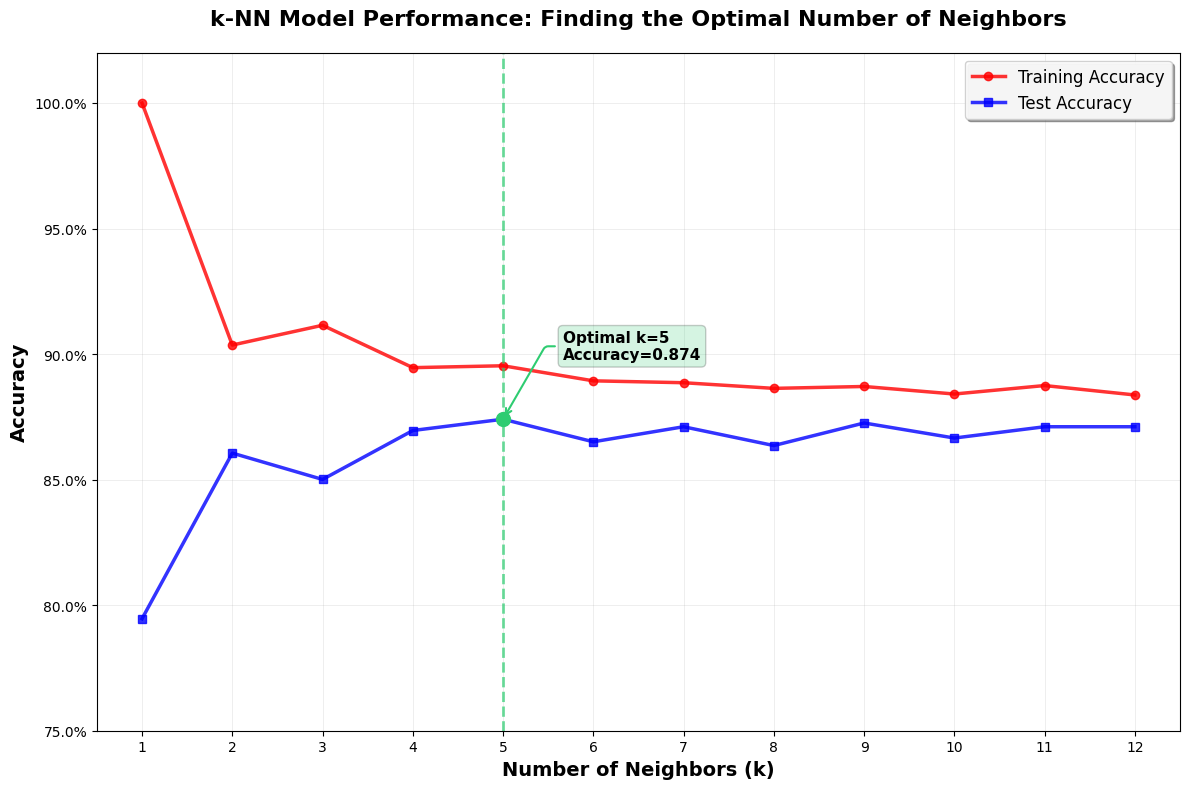

In [ ]:
# Create a more polished plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot training and test accuracies with different styles
train_line = ax.plot(
    neighbors,
    list(train_accuracies.values()),
    color="red",
    linewidth=2.5,
    marker="o",
    markersize=6,
    label="Training Accuracy",
    alpha=0.8,
)

test_line = ax.plot(
    neighbors,
    list(test_accuracies.values()),
    color="blue",
    linewidth=2.5,
    marker="s",
    markersize=6,
    label="Test Accuracy",
    alpha=0.8,
)

# Find and highlight the optimal k value (highest test accuracy)
optimal_k = max(test_accuracies.keys(), key=lambda k: test_accuracies[k])
optimal_accuracy = test_accuracies[optimal_k]

# Add vertical line and annotation for optimal k
ax.axvline(x=optimal_k, color="#2ecc71", linestyle="--", alpha=0.7, linewidth=2)
ax.scatter(optimal_k, optimal_accuracy, color="#2ecc71", s=100, zorder=5)
ax.annotate(
    f"Optimal k={optimal_k}\nAccuracy={optimal_accuracy:.3f}",
    xy=(optimal_k, optimal_accuracy),
    xytext=(43, 43),
    textcoords="offset points",
    fontsize=11,
    fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="#2ecc71", alpha=0.2),
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="angle,angleA=0,angleB=60,rad=3",
        color="#2ecc71",
        lw=1.5,
    ),
)

# Customize plot appearance
ax.set_title(
    "k-NN Model Performance: Finding the Optimal Number of Neighbors",
    fontsize=16,
    fontweight="bold",
    pad=20,
)

ax.set_xlabel("Number of Neighbors (k)", fontsize=14, fontweight="semibold")
ax.set_ylabel("Accuracy", fontsize=14, fontweight="semibold")

# Set axis limits and ticks
ax.set_xlim(0.5, 12.5)
ax.set_ylim(0.75, 1.02)
ax.set_xticks(neighbors)

# Format y-axis as percentages for better readability
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1%}"))

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle="-", linewidth=0.5)
ax.set_axisbelow(True)

# Create legend
legend = ax.legend(
    loc="upper right", fontsize=12, framealpha=0.9, shadow=True, fancybox=True
)
legend.get_frame().set_facecolor("white")

plt.tight_layout()
plt.show()

## Introduction to Regression with `scikit-learn`

While classification models predict discrete labels (e.g., `spam` vs. `not spam`), **regression models** are used when the target variable is continuous. The goal of regression is to understand the relationship between one or more independent variables (features) and a dependent, continuous variable (the target), and to use this relationship to predict numerical outcomes. Examples include predicting a house's price, a patient's blood pressure, or a company's future revenue.

The foundational algorithm in this domain is **Linear Regression**, which aims to find the straight line that best fits the data, describing a linear relationship between the features and the target.

### Step 1: Preparing Data for Regression

The data preparation process for regression is nearly identical to that for classification. We must separate our dataset into a feature matrix, typically denoted `X`, and a target vector, `y`.

  * **`X` (Features)**: A two-dimensional array or DataFrame where each column is a feature and each row is an observation.
  * **`y` (Target)**: A one-dimensional array or Series containing the continuous target values we wish to predict.

It is standard practice to convert these into NumPy arrays using `.values` to ensure compatibility with `scikit-learn`.

```python
# Let's create a generic, reproducible dataset.
# We will predict a 'performance_score' based on 'hours_trained'.
np.random.seed(42)
data = {
    'hours_trained': np.linspace(0, 50, 100),
    'noise': np.random.normal(0, 5, 100) # Add some random noise
}
df_performance = pd.DataFrame(data)
df_performance['performance_score'] = 50 + (1.5 * df_performance['hours_trained']) + df_performance['noise']

print("--- Sample Data Head ---")
print(df_performance.head())

# Create the feature matrix (X) and target vector (y)
# For now, we will use a single feature.
X_feature = df_performance[['hours_trained']].values
y_target = df_performance['performance_score'].values

print(f"\nShape of feature matrix X: {X_feature.shape}")
print(f"Shape of target vector y: {y_target.shape}")
```

#### A Note on Feature Shape

A critical requirement of `scikit-learn` is that the feature matrix `X` must be two-dimensional, even if you are only using a single feature. The shape should be `(n_samples, n_features)`. When we select a single column from a pandas DataFrame, it becomes a one-dimensional Series. We must reshape it into a 2D array with one column.

  * **Why**: The library's API is designed to consistently handle a matrix of features, so it expects a 2D structure.
  * **How**: If you have a 1D array `my_feature`, you can reshape it using `my_feature.reshape(-1, 1)`. The `-1` is a placeholder that tells NumPy to automatically infer the number of rows based on the array's length.

```python
# If we had selected a 1D array initially:
single_feature_1d = df_performance['hours_trained'].values
print(f"Shape of 1D array: {single_feature_1d.shape}")

# We would reshape it like this:
single_feature_2d = single_feature_1d.reshape(-1, 1)
print(f"Shape of reshaped 2D array: {single_feature_2d.shape}")
```

Our initial selection `df_performance[['hours_trained']].values` (using double square brackets) correctly produces a 2D array from the start.

### Step 2: Visualising the Relationship

Before fitting a model, it is essential to visualise the data to understand the relationship between the feature and the target. For a single feature and a continuous target, a scatter plot is the ideal visualisation.

```python
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot using seaborn
sns.scatterplot(x=X_feature.flatten(), y=y_target, alpha=0.6, ax=ax)

# Customize the plot
ax.set_title('Relationship between Training Hours and Performance Score')
ax.set_xlabel('Hours Trained')
ax.set_ylabel('Performance Score')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
```

The scatter plot reveals a clear positive linear trend: as the hours trained increase, the performance score also tends to increase. This visual confirmation suggests that a linear regression model is a suitable choice.

### Step 3: Fitting a Linear Regression Model

The process for fitting a regression model in `scikit-learn` follows the exact same API pattern as classification: **Instantiate, Fit, Predict**.

1.  **Instantiate**: Create an instance of the `LinearRegression` model.
2.  **Fit**: Call the `.fit()` method on the training data (`X_feature`, `y_target`). The model learns the optimal slope and intercept for the line that best fits the data.
3.  **Predict**: Use the fitted model's `.predict()` method to generate predictions for the feature data.


```python
from sklearn.linear_model import LinearRegression

# 1. Instantiate the model
reg_model = LinearRegression()

# 2. Fit the model to the data
reg_model.fit(X_feature, y_target)

# 3. Generate predictions for the input data
# The model now knows the line equation and can predict a y-value for any given x-value.
predictions = reg_model.predict(X_feature)
```

### Step 4: Visualising the Regression Line

The output of our linear regression model is a straight line. The best way to assess the model's fit is to plot this line over our original scatter plot.

```python
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data points using seaborn
sns.scatterplot(x=X_feature.flatten(), y=y_target, alpha=0.6, label='Actual Data', ax=ax)

# Plot the regression line using seaborn
sns.lineplot(x=X_feature.flatten(), y=predictions, color='red', linewidth=2, label='Regression Line', ax=ax)

# Customize the plot
ax.set_title('Linear Regression Fit')
ax.set_xlabel('Hours Trained')
ax.set_ylabel('Performance Score')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
```

The red line represents the model's learned relationship. It is the line that minimises the overall distance to all the data points (specifically, it minimises the "sum of squared errors"). This model can now be used to predict the performance score for any new value of `hours_trained`.

In [ ]:
diabetes_df = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Creating feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

In [ ]:
# Making predictions from a single feature
X_bmi = diabetes_df["bmi"].values.reshape(
    -1, 1
)  # Features must be formatted as a two-dimensional array to be accepted by scikit-learn

print(y.shape, X_bmi.shape)

(768,) (768, 1)


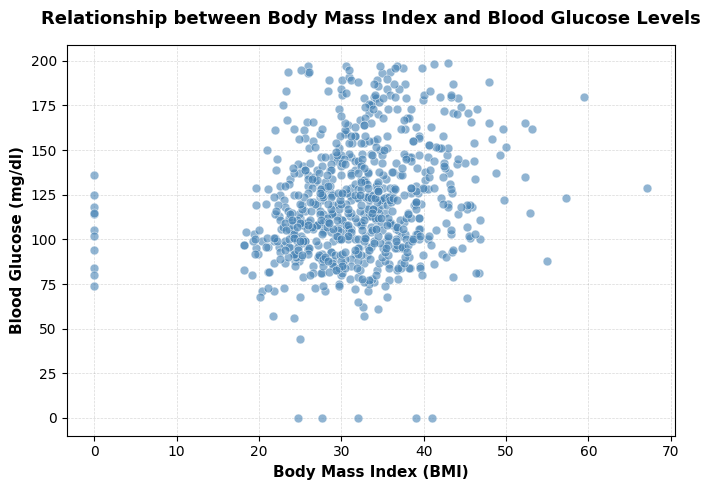

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=X_bmi.flatten(), y=y, alpha=0.6, color="steelblue", s=40, ax=ax)

ax.set_xlabel("Body Mass Index (BMI)", fontsize=11, fontweight="semibold")
ax.set_ylabel("Blood Glucose (mg/dl)", fontsize=11, fontweight="semibold")
ax.set_title(
    "Relationship between Body Mass Index and Blood Glucose Levels",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey", linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

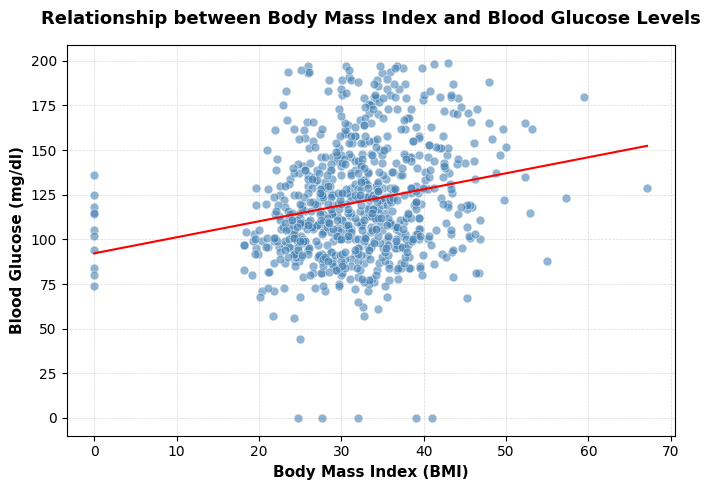

In [ ]:
# Fitting a regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

# Plotting the predictions
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=X_bmi.flatten(), y=y, alpha=0.6, color="steelblue", s=40, ax=ax)
sns.lineplot(x=X_bmi.flatten(), y=predictions, color="red", ax=ax)

ax.set_xlabel("Body Mass Index (BMI)", fontsize=11, fontweight="semibold")
ax.set_ylabel("Blood Glucose (mg/dl)", fontsize=11, fontweight="semibold")
ax.set_title(
    "Relationship between Body Mass Index and Blood Glucose Levels",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey", linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Creating features
In this chapter, you will work with a dataset called `sales_df`, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. 

You will use the advertising expenditure as features to predict sales values, initially working with the `"radio"` column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [ ]:
sales_df = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [ ]:
# Create X, an array of the values from the sales_df DataFrame's "radio" column.
X = sales_df["radio"].values.reshape(
    -1, 1
)  # Reshape X into a two-dimensional NumPy array.

# Create y, an array of the values from the sales_df DataFrame's "sales" column.
y = sales_df["sales"].values

# Print the shape of X and y.
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [ ]:
# Import LinearRegression.
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model.
reg = LinearRegression()

# Predict sales values using X, storing as predictions.
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between `radio` advertising expenditure and sales values.

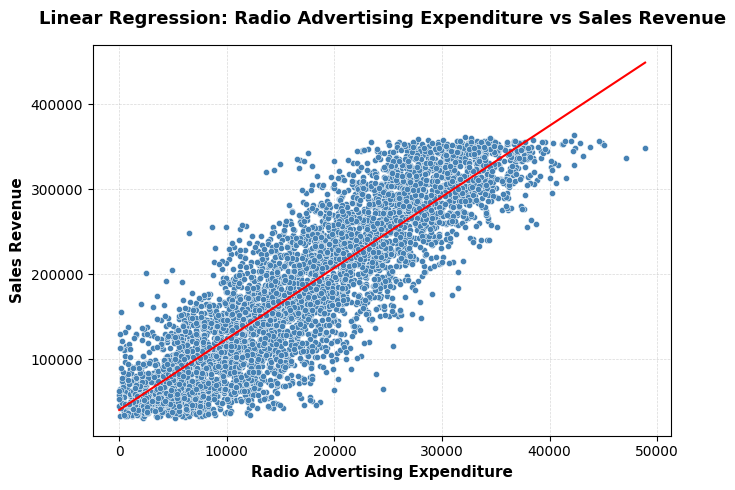

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=X.flatten(), y=y, alpha=1, color="steelblue", s=20, ax=ax)
sns.lineplot(x=X.flatten(), y=predictions, color="red", ax=ax)

ax.set_xlabel("Radio Advertising Expenditure", fontsize=11, fontweight="semibold")
ax.set_ylabel("Sales Revenue", fontsize=11, fontweight="semibold")
ax.set_title(
    "Linear Regression: Radio Advertising Expenditure vs Sales Revenue",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey", linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## The Basics of Linear Regression

To build a linear regression model, you find the line (or hyperplane) that best fits your data. This is done by choosing the model's parameters—its slope and intercept—that **minimize** the overall error between the model's predictions and the actual data points. The most common method for this is called **Ordinary Least Squares (OLS)**.

## How Linear Regression "Learns": Minimizing Errors

At its heart, linear regression is about finding the best-fitting straight line to describe the relationship between features and a target. For **simple linear regression** (one feature), this line is described by the familiar equation:

$y = ax + b$

Where:

  * `y` is the **target** variable we want to predict.
  * `x` is the single **feature** variable.
  * `a` and `b` are the model's **parameters**: `a` is the **slope** (how much `y` changes for a one-unit change in `x`), and `b` is the **y-intercept** (the value of `y` when `x` is zero).

The central question is: out of all the infinite possible lines, how does the algorithm choose the best `a` and `b`? 

It does so by defining an **error function** (also called a **loss function** or **cost function**). This function quantifies how "wrong" a given line is for the data. The goal is to find the line that makes this error as small as possible.

The method used by standard linear regression is called **Ordinary Least Squares (OLS)**. The error function it seeks to minimize is the **Residual Sum of Squares (RSS)**. A **residual** is simply the vertical distance between an actual data point ($y\_i$) and the predicted point on the regression line ($\\hat{y}\_i$).

The RSS is calculated as:

$$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

OLS works by finding the specific values of `a` and `b` that result in the **minimum possible RSS**. It "squares" the errors so that negative residuals (points below the line) don't cancel out positive ones, and it penalizes larger errors more heavily.


### Linear Regression in Higher Dimensions

The concept extends directly to **multiple linear regression**, where we use more than one feature to predict the target. The equation simply includes more terms:

$y = a\_1x\_1 + a\_2x\_2 + \\dots + a\_nx\_n + b$

Here, the model must find an optimal **coefficient** (`a`) for *each* of the `n` features, plus the intercept `b`. Geometrically, this is no longer a line but a **hyperplane** that slices through the higher-dimensional space.

Despite this increase in complexity, the core principle of OLS remains the same: find the set of coefficients and the intercept that minimize the RSS. A beautiful feature of `scikit-learn` is that its API doesn't change. You `fit` the model on your feature matrix `X`, and the library handles finding all the necessary coefficients, whether you have one feature or one thousand.


### Evaluating Regression Model Performance 

Once we've trained our model, we need to evaluate how well it performs on unseen test data. For regression, accuracy isn't the right metric. Instead, we use metrics that measure the magnitude of the model's prediction errors.

### R-squared ($R^2$)

**R-squared** measures the **proportion of the variance in the target variable that is predictable from the feature variables**.

  * **Range**: Its value is typically between 0 and 1.
  * **Interpretation**:
      * An $R^2$ of 1 means the model perfectly explains all the variability in the target data.
      * An $R^2$ of 0 means the model explains none of the variability (it's no better than simply predicting the mean of the target).
      * An $R^2$ of 0.75 means that 75% of the variance in the target can be explained by the features in the model.
  * **In `scikit-learn`**: The `.score()` method of a fitted regression model conveniently returns the $R^2$ value.

#### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

While $R^2$ gives us a proportional measure of fit, **Root Mean Squared Error (RMSE)** gives us a measure of the typical error magnitude in the original units of the target variable.

First, we define **Mean Squared Error (MSE)**:

$$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

This is simply the average of the squared errors. However, its units are the *square* of the target's units (e.g., "dollars squared"), which isn't very interpretable. To fix this, we take the square root to get the RMSE.

$$RMSE = \sqrt{MSE}$$

  * **Interpretation**: The RMSE can be interpreted as the "standard deviation of the residuals." It tells you, on average, how far your model's predictions are from the actual values, measured in the **same units as your target variable**. A smaller RMSE indicates a better fit.


### Practical Implementation in `scikit-learn`

Let's put this all together. We'll fit a multiple linear regression model and evaluate it using both $R^2$ and RMSE.

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Create a generic, reproducible dataset with multiple features
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 3), columns=['feature_1', 'feature_2', 'feature_3'])
y = 10 * X['feature_1'] + 5 * X['feature_2'] - 3 * X['feature_3'] + np.random.normal(0, 2, 100)

# 1. Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Instantiate and fit the model 
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# 3. Make predictions on the test set 
y_pred = reg_all.predict(X_test)

# 4. Evaluate the model

# Calculate R-squared using the .score() method
r_squared = reg_all.score(X_test, y_test)
print(f"R-squared (R²): {r_squared:.4f}")

# Calculate Root Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
```

This workflow—**split, fit, predict, evaluate**—is the cornerstone of building and testing supervised learning models. Using metrics like $R^2$ and RMSE provides a quantitative way to understand your regression model's performance. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# First, let's check what columns we have and handle categorical data
print("Columns in sales_df:", sales_df.columns.tolist())
print("Data types:")
print(sales_df.dtypes)

# Select only numeric columns for features (excluding 'sales' which is our target)
numeric_columns = sales_df.select_dtypes(include=[np.number]).columns.tolist()
if "sales" in numeric_columns:
    numeric_columns.remove("sales")

print("Using numeric features:", numeric_columns)

# Create X, an array containing values of numeric features, and y, containing all values from the "sales" column.
X = sales_df[numeric_columns].values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instantiate a linear regression model.
reg = LinearRegression()

# Fit the model to the training data.
reg.fit(X_train, y_train)

# Create y_pred, making predictions for sales using the test features.
y_pred = reg.predict(X_test)

print("\nLinear Regression Model Predictions vs Actual Values")
print("=" * 50)
for i in range(min(5, len(y_pred))):
    print(
        f"Sample {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test[i]:.2f}, Error = {abs(y_pred[i] - y_test[i]):.2f}"
    )

Columns in sales_df: ['tv', 'radio', 'social_media', 'influencer', 'sales']
Data types:
tv              float64
radio           float64
social_media    float64
influencer       object
sales           float64
dtype: object
Using numeric features: ['tv', 'radio', 'social_media']

Linear Regression Model Predictions vs Actual Values
Sample 1: Predicted = 53176.66, Actual = 55261.28, Error = 2084.62
Sample 2: Predicted = 70996.20, Actual = 67574.90, Error = 3421.30
Sample 3: Predicted = 267032.64, Actual = 272250.11, Error = 5217.47
Sample 4: Predicted = 195731.02, Actual = 195102.18, Error = 628.84
Sample 5: Predicted = 274005.60, Actual = 273960.38, Error = 45.22


In [ ]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("Model Performance Metrics")
print("=" * 30)
print(f"R-squared (R²): {r_squared:.4f}")
print(f"The model explains {r_squared:.1%} of the variance in sales data")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"On average, predictions are off by ${rmse:.2f} in sales")

Model Performance Metrics
R-squared (R²): 0.9990
The model explains 99.9% of the variance in sales data
Root Mean Squared Error (RMSE): 2944.43
On average, predictions are off by $2944.43 in sales
